In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.datasets import load_iris

In [6]:

data = load_iris()
X,y = data.data, data.target
chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)
pairwise_tukeyhsd = [list(pairwise_tukeyhsd(X[:,i],y).reject) for i in range(4)]
print('data.feature_names', data.feature_names)
print('chi2 score        ', chi2_score)
print('chi2 p-value      ', chi_2_p_value)
print('F - score score   ', f_score)
print('F - score p-value ', f_p_value)
print('mutual info       ', mut_info_score)
print('pairwise_tukeyhsd',pairwise_tukeyhsd)


data.feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
chi2 score         [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
chi2 p-value       [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
F - score score    [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
F - score p-value  [1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]
mutual info        [0.50418806 0.24467254 0.98855203 0.98696827]
pairwise_tukeyhsd [[True, True, True], [True, True, True], [True, True, True], [True, True, True]]


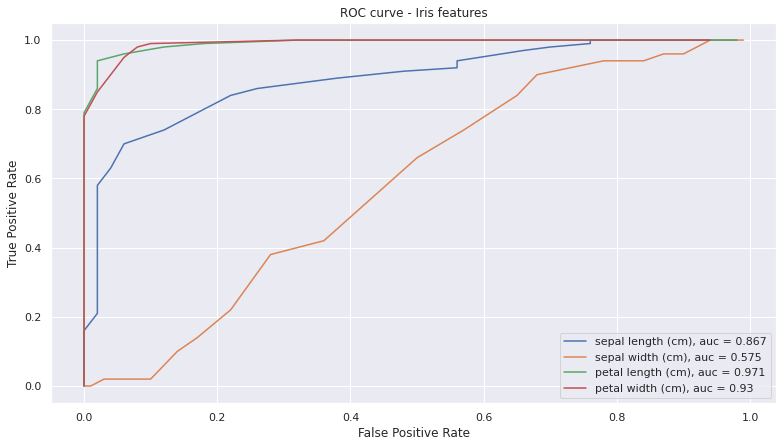

In [5]:

# loading dataset
data = load_iris()
X, y = data.data, data.target
y_ = y == 2
plt.figure(figsize=(13,7))
for col in range(X.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(X[:,col]),max(X[:,col]),100):
        detP = X[:,col] < threshold
        tpr.append(sum(detP & y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~y_))/sum((~y_)))# FP/N
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=data.feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [4]:
data_x = np.load("data/k_mers/k123_datax.npy")
data_x = data_x.reshape(data_x.shape[0],-1)
# data_x = np.genfromtxt("data/Pse_in_One2/DNA/cdhit80_data_seq_loc75_PCPseTNCGeneral_all_index.csv", delimiter=',')
data_y = np.load("data/linear_features/data_y.npy")

f_score, f_p_value = f_classif(data_x, data_y)
mut_info_score = mutual_info_classif(data_x, data_y)
# pairwise_tukeyhsd = [list(pairwise_tukeyhsd(data_x[:,i], data_y).reject) for i in range(data_x.shape[1])]
print('F - score score   ', f_score)
print('F - score max     ', max(f_score))
print('F - score p-value ', f_p_value)
print('mutual info       ', mut_info_score)
# print('pairwise_tukeyhsd',pairwise_tukeyhsd)

F - score score    [7.82622127e-01 8.34581810e-03 6.42131749e+00 9.66531020e+00
 4.19968030e-01 1.59787915e-04 2.84031085e-03 3.13662795e-01
 4.37935040e+00 3.03562897e+00 3.32505577e+00 6.23488684e-02
 3.55761591e+00 2.21904650e+00 2.12833523e+00 8.55997358e+00
 2.86571250e-01 5.68188764e-01 9.44005619e+00 9.56598964e+00
 1.62048732e+00 1.81058260e-01 3.55229894e+00 3.52711881e-01
 2.26631486e-01 4.63877661e-04 1.34982522e+00 3.52069482e+00
 3.50973195e+00 2.41514748e-03 1.83508071e-01 3.35230553e-02
 1.19020883e+00 5.51401785e-02 1.01695285e+00 3.29711853e-02
 2.71940992e-01 1.07451605e-01 9.38036969e-01 8.14476287e-01
 4.97158629e-01 2.83369482e+00 7.51038524e+00 7.53006518e-01
 2.79517635e+00 4.69419689e+00 1.13882958e+00 3.22393319e+00
 1.17250764e+00 5.32534606e+00 4.87208777e+00 1.00939261e+01
 4.36146826e+00 1.09651652e+01 1.51041963e+00 2.32298965e-03
 3.88586427e+00 5.21688694e+00 7.19680345e+00 7.70803578e-02
 2.63560487e+00 4.31416621e+00 1.02623089e+00 2.22853509e+00
 7.37

In [ ]:
plt.figure(figsize=(13,7))
for col in range(data_x.shape[1]):
    tpr,fpr = [],[]
    for threshold in np.linspace(min(data_x[:,col]),max(data_x[:,col]),100):
        detP = data_x[:,col] < threshold
        tpr.append(sum(detP & y_)/sum(y_))# TP/P, aka recall
        fpr.append(sum(detP & (~y_))/sum((~y_)))# FP/N
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=data.feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [1]:
from sklearn.feature_selection import SelectKBest
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)